In [2]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('pizza_customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Making constants for the column names
custid = 'CustomerID'
gender = 'Gender'
age = 'Age'
annual_income = 'Annual Income (k$)'
spending_score = 'Spending Score (1-100)'
clusters = 'clusters'

In [4]:
data[[age, annual_income, spending_score]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


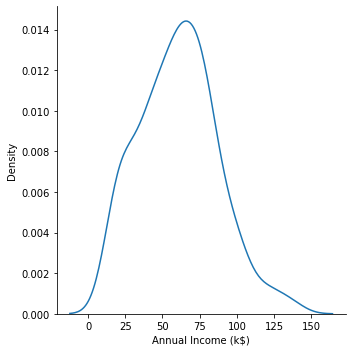

In [5]:
sns.displot(data, x=annual_income, kind='kde')

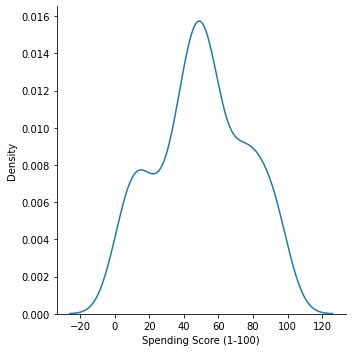

In [6]:
sns.displot(data, x=spending_score, kind='kde')

From this we can see that many young people, in the range of (20-40), prefer pizza. The distribution is left skewed

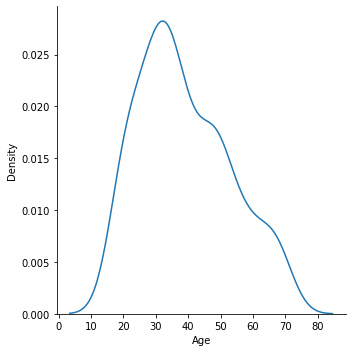

In [7]:
sns.displot(data, x=age, kind='kde')

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)

clustered_data = kmeans.fit_predict(data[[annual_income, spending_score]])

clustered_data.shape

(200,)

In [9]:
data['clusters'] = clustered_data

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

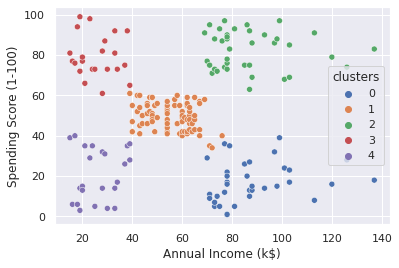

In [85]:
sns.scatterplot(data=data, x=annual_income, y=spending_score, hue=clusters, palette="deep")

In [11]:
data[[annual_income, spending_score]].loc[2].to_numpy()

array([16,  6])

In [65]:
from random import randint, seed
from pprint import pprint
import numpy as np
class kmeans:
    def __init__(self, clusters, random_seed = -1):
        self._n_clusters = int(clusters)
        self._random_seed = random_seed
    
    def fit(self, data: pd.DataFrame):
        # Initialise the centroids
        self._start_points(data)
        
        # Loop till all the points have been covered (which is to loop through the whole data)
        # pprint(self._centroids)
        data_np = data.to_numpy()
        
        for point in data_np:
            # Find the closest centroid
            closest_centroid_index = self._find_closest_centroid(point)
            self._update_centroid(point, closest_centroid_index)
            
    def predict(self, data: pd.DataFrame):
        data_np = data.to_numpy()
        point_cluster = []
        for point in data_np:
            closest_centroid_index = self._find_closest_centroid(point)
            point_cluster.append(closest_centroid_index)
        return np.array(point_cluster)
    
    def get_centroids(self):
        return self._centroids
        
    
    def _start_points(self, data: pd.DataFrame):
        self._centroids = [0] * self._n_clusters
        if (self._random_seed >= 0):
            seed(self._random_seed)
        self._centroid_indices = [randint(0, data.shape[0] - 1) for _ in range(self._n_clusters)]
        for i in range(self._n_clusters):
            self._centroids[i] = data.loc[self._centroid_indices[i]].to_numpy()
            
    def _find_closest_centroid(self, point: np.ndarray):
        close_centroid = self._centroids[0]
        close_centroid_index = 0
        min_distance = np.sqrt(np.sum(np.square(point - close_centroid)))
        for index, centroid in enumerate(self._centroids):
            distance = np.sqrt(np.sum(np.square(point - centroid)))
            if (distance < min_distance):
                close_centroid = centroid
                close_centroid_index = index
                min_distance = distance
        return close_centroid_index
    
    def _update_centroid(self, point: np.ndarray, centroid_index: int):
        stacked = np.stack((point, self._centroids[centroid_index]))
        self._centroids[centroid_index] = np.mean(stacked, axis = 1)
    

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

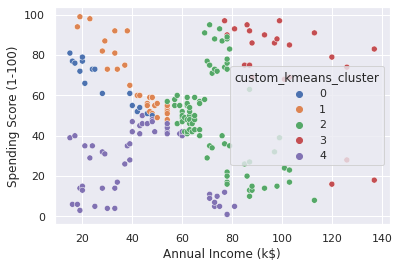

In [84]:
# Custom kmeans
k = kmeans(clusters=5)
k.fit(data[[annual_income, spending_score]])

custom_kmeans_cluster = 'custom_kmeans_cluster'

data[custom_kmeans_cluster] = k.predict(data[[annual_income, spending_score]])

# data.head()
sns.set_theme()

sns.scatterplot(data=data, x=annual_income, y=spending_score, hue=custom_kmeans_cluster, palette="deep")